In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions


warnings.filterwarnings(action='ignore')

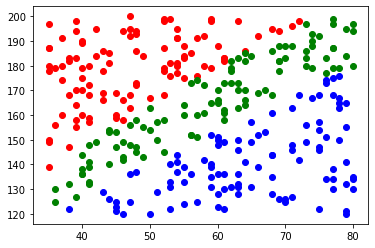

In [5]:
df = pd.read_csv('../data/bmi/bmi.csv', skiprows=3)
raw_data = df.loc[df['label']==0].head(100)
raw_data = pd.concat([raw_data, df.loc[df['label']==1].head(100)])
raw_data = pd.concat([raw_data, df.loc[df['label']==2].head(100)])

plt.scatter(raw_data.loc[df['label']==0,'weight'], raw_data.loc[df['label']==0,'height'], color='r')
plt.scatter(raw_data.loc[df['label']==1,'weight'], raw_data.loc[df['label']==1,'height'], color='g')
plt.scatter(raw_data.loc[df['label']==2,'weight'], raw_data.loc[df['label']==2,'height'], color='b')
plt.show()

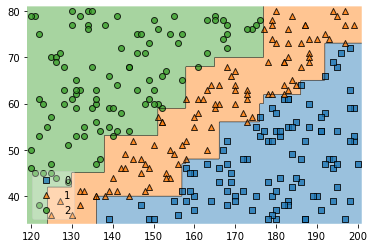

In [3]:
model = DecisionTreeClassifier()
model.fit(raw_data.drop(columns='label').values, raw_data['label'].values)

plot_decision_regions(X=raw_data.drop(columns='label').values, 
                      y=raw_data['label'].values, 
                      clf=model, legend=3)
plt.show()

## 전체 Data를 이용해서 Decision Tree로 모델을 구축하고 Accuracy 측정

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x_data = df.drop(columns='label').copy().values
t_data = df['label'].values

x_train, x_test, t_train, t_test = \
train_test_split(x_data, t_data, test_size=0.3, random_state=0)

model_f = DecisionTreeClassifier()
model_f.fit(x_train, t_train)

result = model_f.predict(x_test)
print(classification_report(t_test, result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1902
           1       1.00      1.00      1.00      1760
           2       1.00      1.00      1.00      2338

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

